# Molecular dynamics

## With OpenMM

```python
import openmm as mm
from openmm import unit
from uibcdf_systems import HarmonicWell

molecular_system = HarmonicWell(n_particles = 1, mass = 32 * unit.amu,
                                k=5.0 * unit.kilocalories_per_mole/unit.nanometers**2)

integrator = mm.LangevinIntegrator(300.0*unit.kelvin, 1.0/unit.picoseconds, 0.02*unit.picoseconds)
platform = Platform.getPlatformByName('CUDA')
simulation = Simulation(molecular_system.topology, molecular_system.system, integrator, platform)

coordinates = np.zeros([1, 3], np.float32) * unit.nanometers
simulation.context.setPositions()

velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds
simulation.context.setVelocities()

simulation.step(1000)
```

## With this library

## Newtonian dynamics

In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from openmm import unit

In [2]:
from uibcdf_systems import HarmonicWell
from uibcdf_systems.tools import langevin

molecular_system = HarmonicWell(n_particles = 1, mass = 32 * unit.amu,
                                k=5.0 * unit.kilocalories_per_mole/unit.nanometers**2)

In [3]:
initial_positions = np.zeros([1, 3], np.float32) * unit.nanometers
initial_positions[0,0] = 1.0 * unit.nanometers

initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds

molecular_system.set_coordinates(initial_positions)
molecular_system.set_velocities(initial_velocities)

In [4]:
traj_dict = langevin(molecular_system,
                     friction=0.0/unit.picoseconds,
                     temperature=0.0*unit.kelvin,
                     time=50.0*unit.picoseconds,
                     saving_timestep=0.1*unit.picoseconds,
                     integration_timestep=0.005*unit.picoseconds)

  0%|          | 0/10000 [00:00<?, ?it/s]

We can now plot the trajectory of the x coordinate:

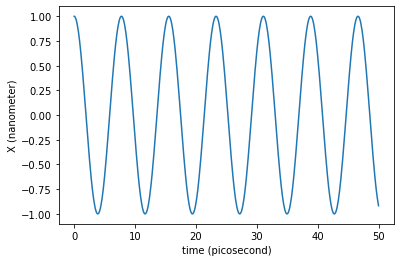

In [5]:
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,0])
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

We can wonder now if the period of these oscillations is in agreement with the value calculated above.

In [6]:
mass = molecular_system.parameters['mass']
k = molecular_system.parameters['k']
T = 2*np.pi*np.sqrt(mass/k)

print('The period of the small oscillations around the minimum is',T)

The period of the small oscillations around the minimum is 7.770948260727904 ps


In [7]:
molecular_system.get_oscillations_time_period()

Quantity(value=7.770948260727904, unit=picosecond)

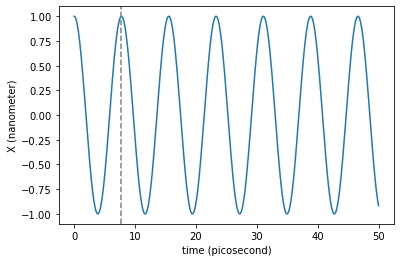

In [8]:
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,0])
plt.axvline(T._value, color='gray', linestyle='--') # Period of the harmonic oscillations
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

Remember that the integration timestep must be smaller than $\sim T/10.0$ to guarantee that no artifacts are introduced by the timestep size.

The newtonian dynamics can also include damping. This way we can simulate damped oscillations around the minimum.

In [9]:
traj_dict = langevin(molecular_system,
                     friction=0.25/unit.picoseconds,
                     temperature=0.0*unit.kelvin,
                     time=50.0*unit.picoseconds,
                     saving_timestep=0.1*unit.picoseconds,
                     integration_timestep=0.02*unit.picoseconds)

  0%|          | 0/2500 [00:00<?, ?it/s]

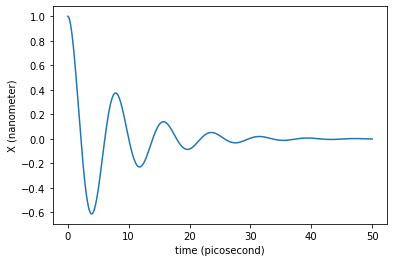

In [10]:
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,0])
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

What would be the friction value needed to enter in the overdamped regime?

In [11]:
traj_dict = langevin(molecular_system,
                     friction=5.0/unit.picoseconds,
                     temperature=0.0*unit.kelvin,
                     time=50.0*unit.picoseconds,
                     saving_timestep=0.1*unit.picoseconds,
                     integration_timestep=0.02*unit.picoseconds)

  0%|          | 0/2500 [00:00<?, ?it/s]

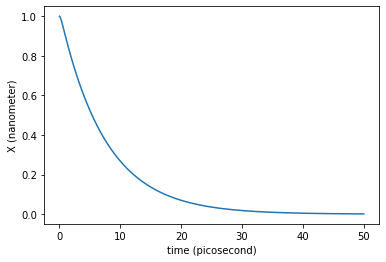

In [12]:
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,0])
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

## Langevin dynamics 

In [13]:
traj_dict = langevin(molecular_system,
                     friction=1.0/unit.picoseconds,
                     temperature=300.0*unit.kelvin,
                     time=1.0*unit.nanoseconds,
                     saving_timestep=0.5*unit.picoseconds,
                     integration_timestep=0.02*unit.picoseconds)


  0%|          | 0/50000 [00:00<?, ?it/s]

Let us see the time evolution of the coordinate $x$ of our single particle:

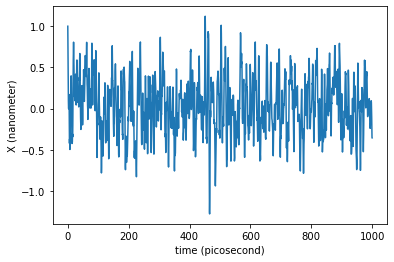

In [14]:
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,0])
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

In [15]:
molecular_system.get_standard_deviation(300.0*unit.kelvin)

Quantity(value=0.34530023967331663, unit=nanometer)

In [16]:
np.std(traj_dict['coordinates'][:,0,0])

Quantity(value=0.34393127752734576, unit=nanometer)